# Práctica 3

Ana Gil Molina

### Ejercicio 1: Razonamiento con Redes Bayesianas

Supongamos la siguiente red bayesiana proporcionada por un experto de una empresa energética:

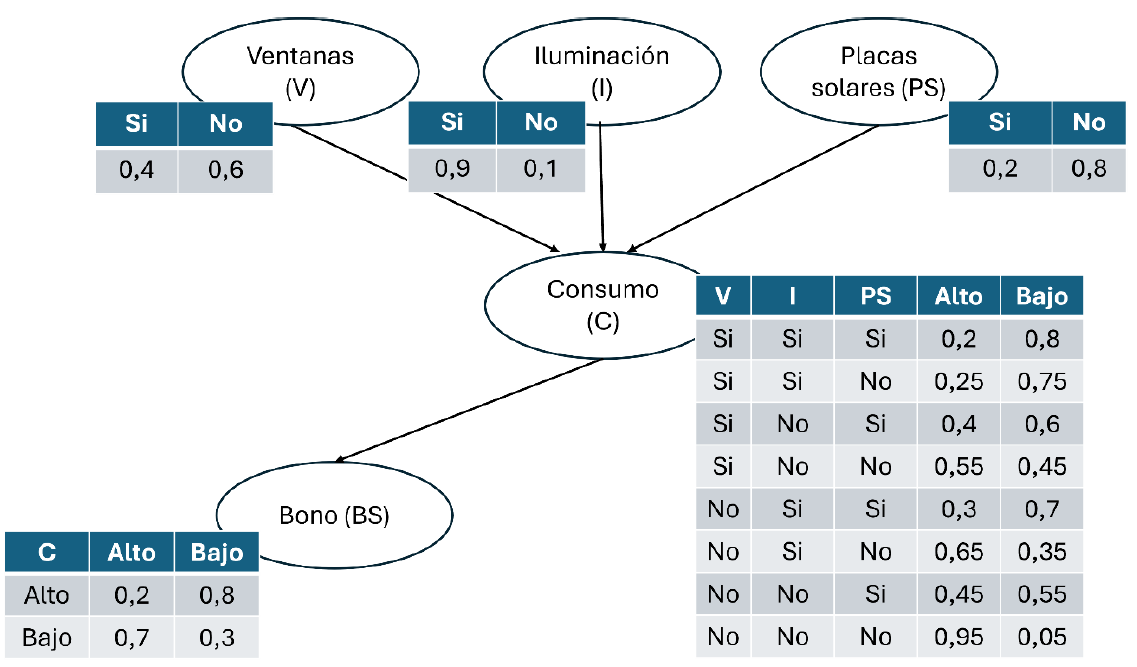

En la red aparecen 5 variables. Las variables "Ventanas", "Iluminación" y "Placas solares" indican los valores y sus probabilidades de que una vivienda disponga de ventanas con aislamiento térmico, iluminación led y placas solares, todas ellas medidas de ahorro energético sostenible. Sus posibles valores son {Si, No}. La variable "Consumo" indica el consumo energético de los tipos de viviendas influido por las tres medidas anteriores. Los posibles valores de la variable son {Alto, Bajo}. Por último, la variable "Bono" indica el valor y su probabilidad de que el estado conceda un bono de ayuda a los propietarios de los tipos de vivienda por su colaboración al desarrollo sostenible. Los valores de esta variable son {Alto, Bajo}.

Resolver las siguientes cuestiones:

a) Indicar el modelo probabilístico que representa la red bayesiana.

$$P(V,I,PS,C,BS) = P(BS|C) \cdot P(C|V,I,PS) \cdot P(V) \cdot P(I) \cdot P(PS)$$

b) Resolver a mano el proceso de inferencia mediante *Enumeración* para obtener la probabilidad de que se conceda el bono si en una vivienda no se dispone de ninguna medida de sostenibilidad, es decir, (V=no, I=no, PS=no). Comprueba el resultado obtenido usando la librería `pgmpy`.

$P(BS=alto | V=no, I=no, PS=no) = \alpha \cdot P(BS=alto, V=no, I=no, PS=no) = \alpha \cdot \left[\sum_{c\in\{alto, bajo\}} P(V=no, I=no, PS=no, C=c, BS=alto)\right] =$

$= \alpha \cdot \left[\sum_{c\in\{alto, bajo\}} P(BS = alto | C=c) \cdot P(C=c|V=no,I=no,PS=no) \cdot P(V=no) \cdot P(I=no) \cdot P(PS=no)\right] =$

$= \alpha \cdot [P(BS = alto | C=alto) \cdot P(C=alto|V=no,I=no,PS=no) \cdot P(V=no) \cdot P(I=no) \cdot P(PS=no)$

$\hspace{0.3cm} + P(BS = alto | C=bajo) \cdot P(C=bajo|V=no,I=no,PS=no) \cdot P(V=no) \cdot P(I=no) \cdot P(PS=no)] =$

$= \alpha \cdot [0.2 \cdot 0.95 \cdot 0.6 \cdot 0.1 \cdot 0.8 + 0.7 \cdot 0.05 \cdot 0.6 \cdot 0.1 \cdot 0.8] = \alpha \cdot 0.0108 = 0.225$

$P(BS=bajo | V=no, I=no, PS=no) = \alpha \cdot P(BS=bajo, V=no, I=no, PS=no) = \alpha \cdot \left[\sum_{c\in\{alto, bajo\}} P(V=no, I=no, PS=no, C=c, BS=bajo)\right] =$

$= \alpha \cdot \left[\sum_{c\in\{alto, bajo\}} P(BS=bajo | C=c) \cdot P(C=c|V=no,I=no,PS=no) \cdot P(V=no) \cdot P(I=no) \cdot P(PS=no)\right] =$

$= \alpha \cdot [P(BS=bajo | C=alto) \cdot P(C=alto|V=no,I=no,PS=no) \cdot P(V=no) \cdot P(I=no) \cdot P(PS=no)$

$\hspace{0.3cm} + P(BS=bajo | C=bajo) \cdot P(C=bajo|V=no,I=no,PS=no) \cdot P(V=no) \cdot P(I=no) \cdot P(PS=no)] =$

$= \alpha \cdot [0.8 \cdot 0.95 \cdot 0.6 \cdot 0.1 \cdot 0.8 + 0.3 \cdot 0.05 \cdot 0.6 \cdot 0.1 \cdot 0.8] = \alpha \cdot 0.0372 = 0.775$

In [1]:
'''
Crear una red bayesiana desde un fichero bif
'''

from pgmpy.readwrite import BIFReader
from pgmpy.readwrite import BIFWriter
from pgmpy.inference import VariableElimination
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD

reader = BIFReader("bono.bif")

model = reader.get_model()

# Acceder a los elementos del modelo
var = reader.get_variables()
valores = reader.get_states()
edges = reader.get_edges()
cpds = reader.get_values()

print(f"Variables en el modelo: {var} \n")
print(f"Valores de la variables en el modelo: {valores} \n")
print(f"Aristas en el modelo: {edges} \n")
print(f"CPDs en el modelo: {cpds} \n")

# Imprimir el modelo en fichero bif

writer = BIFWriter(model)
writer.write_bif('bonoW.bif')

# Inferencia por eliminación de variables

model_infer = VariableElimination(model)

# Calcular la probabilidad de Bono dado Ventanas = no, Iluminacion = no,
# PlacasSolares = no

q = model_infer.query(variables=['Bono'], evidence={'Ventanas':'no',
                                                    'Iluminacion':'no',
                                                    'PlacasSolares':'no'})
print(q)


Variables en el modelo: ['Ventanas', 'Iluminacion', 'PlacasSolares', 'Consumo', 'Bono'] 

Valores de la variables en el modelo: {'Ventanas': ['si', 'no'], 'Iluminacion': ['si', 'no'], 'PlacasSolares': ['si', 'no'], 'Consumo': ['alto', 'bajo'], 'Bono': ['alto', 'bajo']} 

Aristas en el modelo: [['Ventanas', 'Consumo'], ['Iluminacion', 'Consumo'], ['PlacasSolares', 'Consumo'], ['Consumo', 'Bono']] 

CPDs en el modelo: {'Ventanas': array([[0.4],
       [0.6]]), 'Iluminacion': array([[0.9],
       [0.1]]), 'PlacasSolares': array([[0.2],
       [0.8]]), 'Consumo': array([[0.2 , 0.25, 0.4 , 0.55, 0.3 , 0.65, 0.45, 0.95],
       [0.8 , 0.75, 0.6 , 0.45, 0.7 , 0.35, 0.55, 0.05]]), 'Bono': array([[0.2, 0.7],
       [0.8, 0.3]])} 

+------------+-------------+
| Bono       |   phi(Bono) |
+============+=============+
| Bono(alto) |      0.2250 |
+------------+-------------+
| Bono(bajo) |      0.7750 |
+------------+-------------+


In [2]:
'''
Definir una red bayesiana en pgmpy supone los siguientes pasos:

Definir la estructura de la red
Definir los parámetros (CPDs)
Asociar los CPDs con la red.
'''

from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD


# Definir la estructura de la red

bono_model = BayesianNetwork(
    [
        ("Ventanas", "Consumo"),
        ("Iluminacion", "Consumo"),
        ("PlacasSolares", "Consumo"),
        ("Consumo", "Bono"),
    ]
)

# Definir los parámetros (CPDs)
# La librería asigna 0 al primer valor de probabilidad y 1 al segundo:
# 0 con 0.4 y 1 con 0.6

cpd_V = TabularCPD(variable="Ventanas", variable_card=2, values=[[0.4], [0.6]])
cpd_I = TabularCPD(variable="Iluminacion", variable_card=2, values=[[0.9], [0.1]])
cpd_PS = TabularCPD(variable="PlacasSolares", variable_card=2, values=[[0.2], [0.8]])
cpd_C = TabularCPD(
    variable="Consumo",
    variable_card=2,
    values=[[0.2, 0.25, 0.4, 0.55, 0.3, 0.65, 0.45, 0.95],
            [0.8, 0.75, 0.6, 0.45, 0.7, 0.35, 0.55, 0.05]],
    evidence=["Ventanas", "Iluminacion", "PlacasSolares"],
    evidence_card=[2, 2, 2],
)
cpd_BS = TabularCPD(
    variable="Bono",
    variable_card=2,
    values=[[0.2, 0.7], [0.8, 0.3]],
    evidence=["Consumo"],
    evidence_card=[2],
)

# Asociar los CPDs con la red.
bono_model.add_cpds(cpd_V, cpd_I, cpd_PS, cpd_C, cpd_BS)

# Comprobar si el modelo se ha construido correctamente
bono_model.check_model()

True

In [3]:
# Acceder a los elementos del modelo
nodes = bono_model.nodes()
edges = bono_model.edges()
cpds = bono_model.get_cpds()


print(f"Nodes in the model: {nodes} \n")
print(f"Edges in the model: {edges} \n")
print(f"CPDs in the model: ")
for cpd in bono_model.get_cpds():
    print(cpd)

Nodes in the model: ['Ventanas', 'Consumo', 'Iluminacion', 'PlacasSolares', 'Bono'] 

Edges in the model: [('Ventanas', 'Consumo'), ('Consumo', 'Bono'), ('Iluminacion', 'Consumo'), ('PlacasSolares', 'Consumo')] 

CPDs in the model: 
+-------------+-----+
| Ventanas(0) | 0.4 |
+-------------+-----+
| Ventanas(1) | 0.6 |
+-------------+-----+
+----------------+-----+
| Iluminacion(0) | 0.9 |
+----------------+-----+
| Iluminacion(1) | 0.1 |
+----------------+-----+
+------------------+-----+
| PlacasSolares(0) | 0.2 |
+------------------+-----+
| PlacasSolares(1) | 0.8 |
+------------------+-----+
+---------------+------------------+-----+------------------+
| Ventanas      | Ventanas(0)      | ... | Ventanas(1)      |
+---------------+------------------+-----+------------------+
| Iluminacion   | Iluminacion(0)   | ... | Iluminacion(1)   |
+---------------+------------------+-----+------------------+
| PlacasSolares | PlacasSolares(0) | ... | PlacasSolares(1) |
+---------------+--------

In [4]:
# Inferencia por eliminación de variables

from pgmpy.inference import VariableElimination

bono_infer = VariableElimination(bono_model)

# Calcular la probabilidad de Bono dado Ventanas = no/1, Iluminacion = no/1,
# PlacasSolares = no/1

q = bono_infer.query(variables=['Bono'], evidence={'Ventanas': 1,
                                                   'Iluminacion': 1,
                                                   'PlacasSolares': 1})
print(q)

+---------+-------------+
| Bono    |   phi(Bono) |
+=========+=============+
| Bono(0) |      0.2250 |
+---------+-------------+
| Bono(1) |      0.7750 |
+---------+-------------+


c) Supongamos que un amigo nos consulta qué dos medidas de sostenibilidad debe instalar para tener una mayor probabilidad de obtener el bono de ayuda. Usando la librería `pgmpy`, llevar a cabo los procesos de inferencia necesarios para resolver la consulta con el conocimiento proporcionado por la anterior red bayesiana.

In [5]:
# Calcular la probabilidad de Bono dado Ventanas = si/0, Iluminacion = si/0,
# PlacasSolares = no/1

q = bono_infer.query(variables=['Bono'], evidence={'Ventanas': 0,
                                                   'Iluminacion': 0,
                                                   'PlacasSolares': 1})
print(q)

+---------+-------------+
| Bono    |   phi(Bono) |
+=========+=============+
| Bono(0) |      0.5750 |
+---------+-------------+
| Bono(1) |      0.4250 |
+---------+-------------+


In [6]:
# Calcular la probabilidad de Bono dado Ventanas = si/0, Iluminacion = no/1,
# PlacasSolares = si/0

q = bono_infer.query(variables=['Bono'], evidence={'Ventanas': 0,
                                                   'Iluminacion': 1,
                                                   'PlacasSolares': 0})
print(q)

+---------+-------------+
| Bono    |   phi(Bono) |
+=========+=============+
| Bono(0) |      0.5000 |
+---------+-------------+
| Bono(1) |      0.5000 |
+---------+-------------+


In [7]:
# Calcular la probabilidad de Bono dado Ventanas = no/1, Iluminacion = si/0,
# PlacasSolares = si/0

q = bono_infer.query(variables=['Bono'], evidence={'Ventanas': 1,
                                                   'Iluminacion': 0,
                                                   'PlacasSolares': 0})
print(q)

+---------+-------------+
| Bono    |   phi(Bono) |
+=========+=============+
| Bono(0) |      0.5500 |
+---------+-------------+
| Bono(1) |      0.4500 |
+---------+-------------+


Habiendo calculado la probabilidad de obtener el bono dado que se instalan dos de las medidas (pero no la otra medida restante), observamos que la combinación que da una mayor probabilidad a que Bono = alto es instalar aislamiento térmico e iluminación led, con una probabilidad de $0.575$.

### Ejercicio 2: Razonamiento en la Teoría de Evidencias de Demspter-Shafer

Supongamos que el Estado proporciona unos bonos de ayuda a proyectos de innovación para crear empresas que tengan en cuenta la sostenibilidad. Un experto en la materia nos indica su creencia para obtener este bono ayuda mediante las dos reglas siguientes:

$R_1$: "Si reciclado es alto entonces bonoAyuda es sí" con un intervalo de probabilidad $[0.7,0.9]$

$R_2$: "Si emisiones es alto entonces bonoAyuda es sí" con un intervalo de probabilidad $[0.75,0.85]$

Donde "reciclado" (Re) es una variable que puede tomar los valores {alto, bajo} indicando el grado de compromiso del proyecto con el reciclado, "emisiones" (Em) es una variable que puede tomar los valores {alto, bajo} indicando el grado de compromiso del proyecto con el control de emisiones a la atmósfera, y "bonoAyuda" (bA) es la variable que puede tomar dos valores {sí, no} indicando si se concede o no el bono de ayuda al proyecto.

El experto ha valorado la propuesta de dos proyectos para la creación de dos nuevas empresas y ha establecido la siguiente valoración:

El proyecto 1 tiene un compromiso alto con el reciclado con un intervalo de probabilidad $[0.8, 1]$ y el proyecto 2 tiene un compromiso alto con las emisiones con un intervalo de probabilidad $[0.8, 1]$.

Resolver la siguiente cuestión:

a) ¿Cuál es el intervalo de probabilidad de que cada proyecto reciba el bono ayuda?

Disponemos de tres variables, "reciclado" (Re), "emisiones" (Em) y "bonoAyuda" (bA):

- La variable "reciclado" toma dos valores, "alto" y "bajo", que denotamos por $A$ y $B$.
- La variable "emisiones" toma dos valores, "alto" y "bajo", que denotamos por $a$ y $b$.
- La variable "bonoAyuda" toma dos valores, "sí" y "no", que denotamos por $s$ y $n$.

#### Proyecto 1

- Dominios: $Re = \{A,B\}$, $bA = \{s,n\}$ y $Re \times bA = \{(A,s), (A,n), (B,s), (B,n)\}$

- Hecho: "Reciclado es alto" con intervalo de probabilidad $[0.8,1]$

    $m_1(A) = 0.8$

    $m_1(Re) = 1-0.8 = 0.2$

- Regla: "Si reciclado es alto entonces bonoAyuda es sí" con intervalo de probabilidad $[0.7,0.9]$

    $m_2(\bar{A} + s) = m_2(B + s) = m_2(\{(A,s), (B,s), (B,n)\}) = 0.7$

    $m_2(A \times \bar s) = m_2(\{(A,n)\}) = 1-0.9 = 0.1$

    $m_2(Re \times bA) = 0.9-0.7 = 0.2$

Para combinar las dos asignaciones, debemos estar en el mismo dominio ($Re \times bA$) y por tanto, debemos extender cíclicamente la asignación $m_1$ al dominio $Re \times bA$.

- $A$ se extiende a $\{(A,s), (A,n)\}$ y como $m_1(A) = 0.8$, obtenemos $m_{1_{Re \times bA}}(\{(A,s), (A,n)\}) = 0.8$.

- $Re$ se extiende a $Re \times bA$ y como $m_1(Re) = 0.2$, obtenemos $m_{1_{Re \times bA}}(Re \times bA) = 0.2$.

Ahora combinamos las dos asignaciones ($m_{1_{Re \times bA}} \oplus m_2$).

|                                 | $\{(A,s), (A,n)\}$ $0.8$  | $Re \times bA$ $0.2$             |
|---------------------------------|---------------------------|----------------------------------|
| $\{(A,s), (B,s), (B,n)\}$ $0.7$ | $\{(A,s)\}$ $0.56$        | $\{(A,s), (B,s), (B,n)\}$ $0.14$ |
| $\{(A,n)\}$ $0.1$               | $\{(A,n)\}$ $0.08$        | $\{(A,n)\}$ $0.02$               |
| $Re \times bA$ $0.2$            | $\{(A,s), (A,n)\}$ $0.16$ | $Re \times bA$ $0.04$            |

$m_{12}(\{(A,s)\}) = 0.56$

$m_{12}(\{(A,n)\}) = 0.08 + 0.02 = 0.1$

$m_{12}(\{(A,s), (A,n)\}) = 0.16$

$m_{12}(\{(A,s), (B,s), (B,n)\}) = 0.14$

$m_{12}(Re \times bA) = 0.04$

Proyectamos $m_{12}$ sobre el dominio $bA$, y así obtenemos la asignación básica de probabilidad sobre $bA$ siguiente:

$m_{12_{bA}}(s) = 0.56$

$m_{12_{bA}}(n) = 0.1$

$m_{12_{bA}}(bA) = 0.16 + 0.14 + 0.04 = 0.34$

El intervalo de probabilidad para $s$ (que el proyecto 1 reciba el bono ayuda) es $[Cr(\{s\}), Pl(\{s\})] = [0.56, 0.9]$.

#### Proyecto 2

- Dominios: $Em = \{a,b\}$, $bA = \{s,n\}$ y $Em \times bA = \{(a,s), (a,n), (b,s), (b,n)\}$

- Hecho: "Emisiones es alto" con intervalo de probabilidad $[0.8,1]$

    $m_1(a) = 0.8$

    $m_1(Em) = 1-0.8 = 0.2$

- Regla: "Si emisiones es alto entonces bonoAyuda es sí" con intervalo de probabilidad $[0.75,0.85]$

    $m_2(\bar{a} + s) = m_2(b + s) = m_2(\{(a,s), (b,s), (b,n)\}) = 0.75$

    $m_2(a \times \bar s) = m_2(\{(a,n)\}) = 1-0.85 = 0.15$

    $m_2(Em \times bA) = 0.85-0.75 = 0.1$

Para combinar las dos asignaciones, debemos estar en el mismo dominio ($Em \times bA$) y por tanto, debemos extender cíclicamente la asignación $m_1$ al dominio $Em \times bA$.

- $a$ se extiende a $\{(a,s), (a,n)\}$ y como $m_1(a) = 0.8$, obtenemos $m_{1_{Em \times bA}}(\{(a,s), (a,n)\}) = 0.8$.

- $Em$ se extiende a $Em \times bA$ y como $m_1(Em) = 0.2$, obtenemos $m_{1_{Em \times bA}}(Em \times bA) = 0.2$.

Ahora combinamos las dos asignaciones ($m_{1_{Em \times bA}} \oplus m_2$).

|                                  | $\{(a,s), (a,n)\}$ $0.8$  | $Em \times bA$ $0.2$             |
|----------------------------------|---------------------------|----------------------------------|
| $\{(a,s), (b,s), (b,n)\}$ $0.75$ | $\{(a,s)\}$ $0.6$         | $\{(a,s), (b,s), (b,n)\}$ $0.15$ |
| $\{(a,n)\}$ $0.15$               | $\{(a,n)\}$ $0.12$        | $\{(a,n)\}$ $0.03$               |
| $Em \times bA$ $0.1$             | $\{(a,s), (a,n)\}$ $0.08$ | $Em \times bA$ $0.02$            |

$m_{12}(\{(a,s)\}) = 0.6$

$m_{12}(\{(a,n)\}) = 0.12 + 0.03 = 0.15$

$m_{12}(\{(a,s), (a,n)\}) = 0.08$

$m_{12}(\{(a,s), (b,s), (b,n)\}) = 0.15$

$m_{12}(Em \times bA) = 0.02$

Proyectamos $m_{12}$ sobre el dominio $bA$, y así obtenemos la asignación básica de probabilidad sobre $bA$ siguiente:

$m_{12_{bA}}(s) = 0.6$

$m_{12_{bA}}(n) = 0.15$

$m_{12_{bA}}(bA) = 0.08 + 0.15 + 0.02 = 0.25$

El intervalo de probabilidad para $s$ (que el proyecto 2 reciba el bono ayuda) es $[Cr(\{s\}), Pl(\{s\})] = [0.6, 0.85]$.

### Ejercicio 3: Razonamiento en la Teoría de Factores de Certeza

Supongamos el conocimiento proporcionado por el experto del ejercicio anterior (las dos reglas y los dos hechos). En este ejercicio, a este conocimiento le asignamos los valores inferiores de los intervalos de probabilidad del ejercicio anterior como la credibilidad/incredulidad en los factores de certeza. Además, añadimos el siguiente conocimiento:

$R_3$: "Si emisiones es alto y reciclado es alto entonces bonoAyuda es si" con una credibilidad del 0.95

Además, el experto ha valorado dos nuevos proyectos: El proyecto 3 tiene un compromiso alto con el reciclado con una credibilidad del 0.7 y un compromiso alto con las emisiones con una credibilidad del 0.5. El proyecto 4 tiene un compromiso alto con las emisiones con una credibilidad del 0.9 y se tiene una incredulidad de que tiene un compromiso alto con el reciclado con un grado del 0.7.

Resolver las siguientes cuestiones:

a) Representar las reglas y los hechos con los factores de certeza.

$R_1$: "Si reciclado es alto entonces bonoAyuda es sí" con una credibilidad del 0.7

$R_2$: "Si emisiones es alto entonces bonoAyuda es sí" con una credibilidad del 0.75

$R_3$: "Si emisiones es alto y reciclado es alto entonces bonoAyuda es si" con una credibilidad del 0.95

Sea la signatura $\Sigma = \{A,B,C\}$ donde:

A = "Re es alto"

B = "Em es alto"

C = "bA es sí"

Construimos el conjunto de reglas:

$R_1$: Si A entonces C, $FC=0.7$

$R_2$: Si B entonces C, $FC=0.75$

$R_3$: Si A y B entonces C, $FC=0.95$

Construimos el conjunto de hechos para cada proyecto:

Proyecto 1 -> A, $FC=0.8$

Proyecto 2 -> B, $FC=0.8$

Proyecto 3 -> A, $FC=0.7$; B, $FC=0.5$

Proyecto 4 -> A, $FC=-0.7$; B, $FC=0.9$

b) ¿Qué proyecto tiene una mayor certeza de recibir el bono ayuda?

- Proyecto 1:

  $FC(A) = 0.8$

  $FC_{R_1}(C) =  FC(C,A)\cdot \max\{0, FC(A)\} = 0.7\cdot 0.8 = 0.56$

- Proyecto 2:

  $FC(B) = 0.8$

  $FC_{R_2}(C) =  FC(C,B)\cdot \max\{0, FC(B)\} = 0.75\cdot 0.8 = 0.6$

- Proyecto 3:

  $FC(A) = 0.7$

  $FC(B) = 0.5$

  $FC_{R_1}(C) =  FC(C,A)\cdot \max\{0, FC(A)\} = 0.7\cdot 0.7 = 0.49$

  $FC_{R_2}(C) =  FC(C,B)\cdot \max\{0, FC(B)\} = 0.75\cdot 0.5 = 0.375$

  $FC(A∧B) = \min\{FC(A), FC(B)\} = \min\{0.7, 0.5\} = 0.5$

  $FC_{R_3}(C) =  FC(C,(A∧B))\cdot \max\{0, FC(A∧B)\} = 0.95\cdot 0.5 = 0.475$

  $FC_{R_1, R_2}(C) = FC_{R_1}(C) + FC_{R_2}(C)\cdot (1-FC_{R_1}(C)) = 0.49 + 0.375 \cdot (1-0.49) = 0.68125$

  $FC_{(R_1, R_2), R_3}(C) = FC_{R_1, R_2}(C) + FC_{R_3}(C) (1-FC_{R_1, R_2}(C)) = 0.68125 + 0.475(1-0.68125) = 0.83265625$

- Proyecto 4:

  $FC(A) = -0.7$

  $FC(B) = 0.9$

  $FC_{R_1}(C) =  FC(C,A)\cdot \max\{0, FC(A)\} = 0.7\cdot \max\{0, -0.7\} = 0$

  $FC_{R_2}(C) =  FC(C,B)\cdot \max\{0, FC(B)\} = 0.75\cdot 0.9 = 0.675$

  $FC(A∧B) = \min\{FC(A), FC(B)\} = \min\{-0.7, 0.9\} = -0.7$

  $FC_{R_3}(C) =  FC(C,(A∧B))\cdot \max\{0, FC(A∧B)\} = 0.95\cdot \max\{0, -0.7\} = 0$

  $FC_{R_1, R_2}(C) = FC_{R_1}(C) + FC_{R_2}(C)\cdot (1-FC_{R_1}(C)) = 0 + 0.675 \cdot (1-0) = 0.675$

  $FC_{(R_1, R_2), R_3}(C) = FC_{R_1, R_2}(C) + FC_{R_3}(C) (1-FC_{R_1, R_2}(C)) = 0.675 + 0(1-0.675) = 0.675$